In [1]:
import seaborn as sns
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('Churn_DataSet.csv')

print(df.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [2]:
#2
#remover linhas repetidas/duplicadas
#se usarmos inplace = True, o df usado é alterado, caso contrário, a função
#apenas iria dar return de um novo dataframe, fruto da remoção dos duplicates
print(df.size)
df.drop_duplicates(inplace=True)
print(df.size)



140640
140200


In [3]:
#3
#verificar se existem missing values
missing_df_values = df.isnull().sum()
print(missing_df_values)

# print(df['gender'].value_counts())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


No     5153
Yes    1857
Name: Churn, dtype: int64


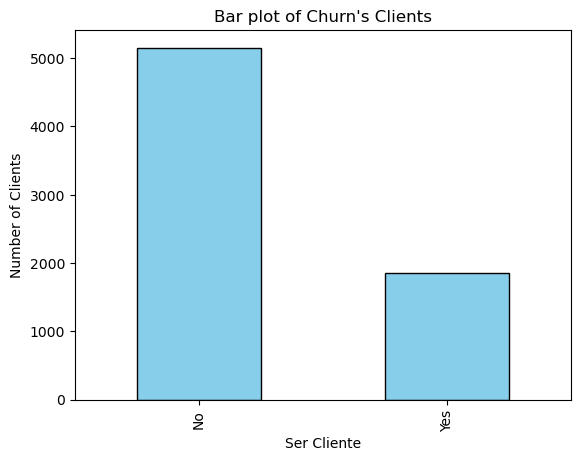

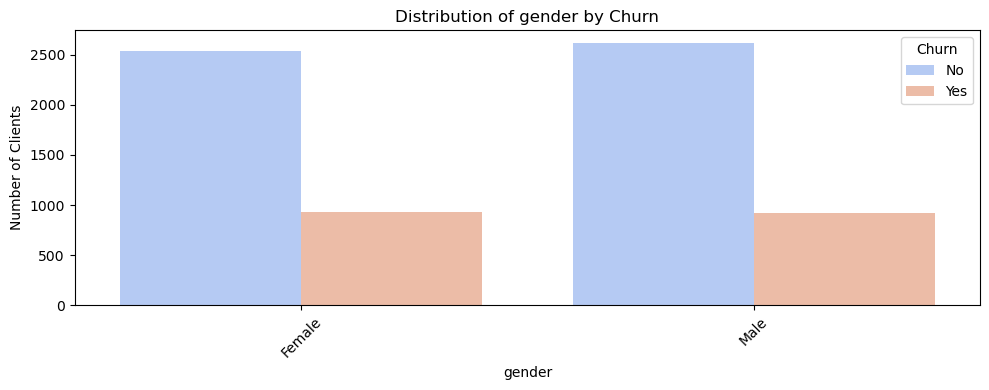

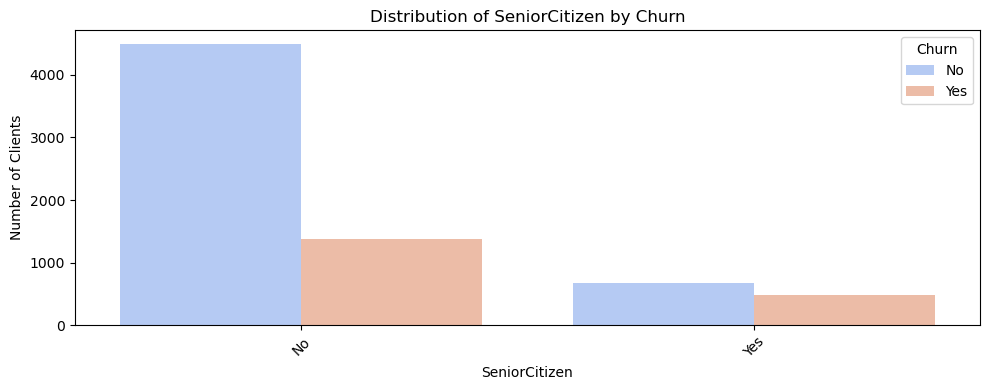

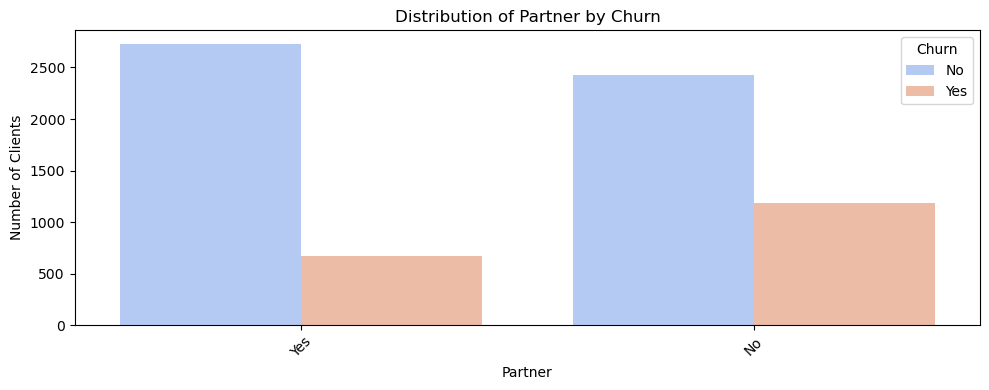

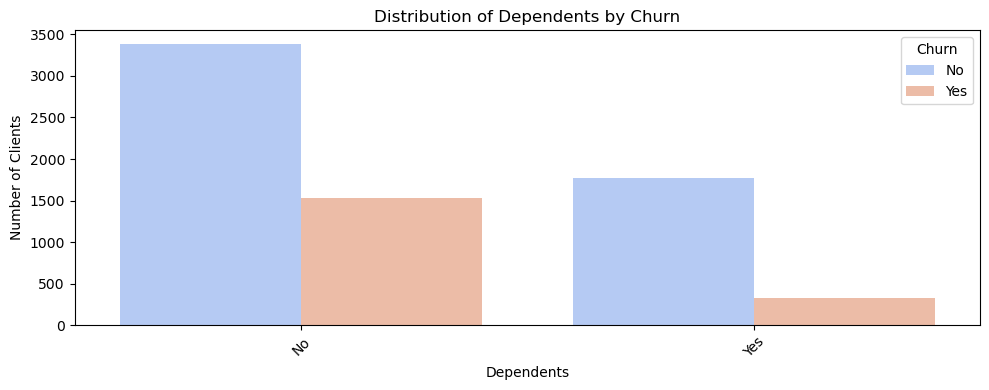

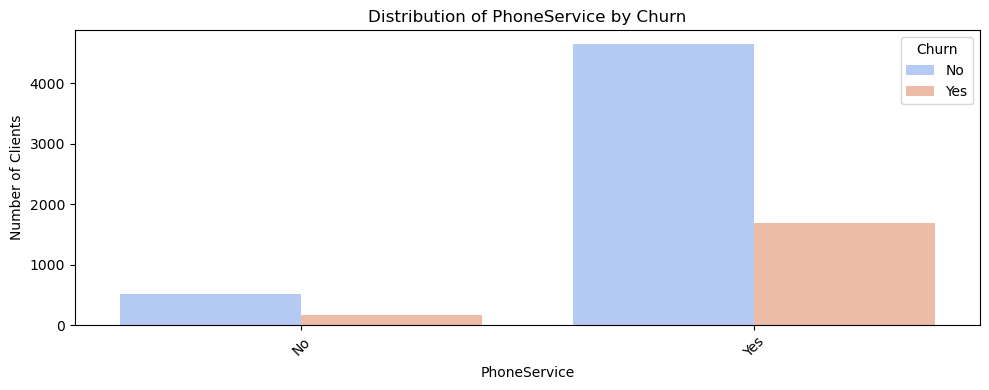

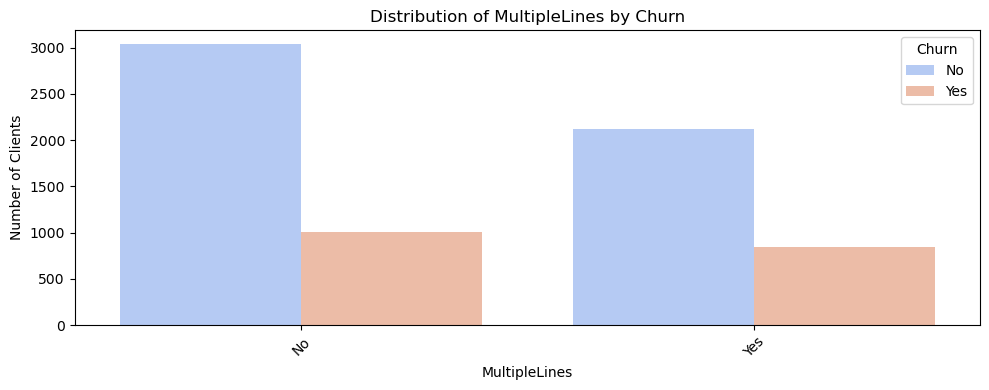

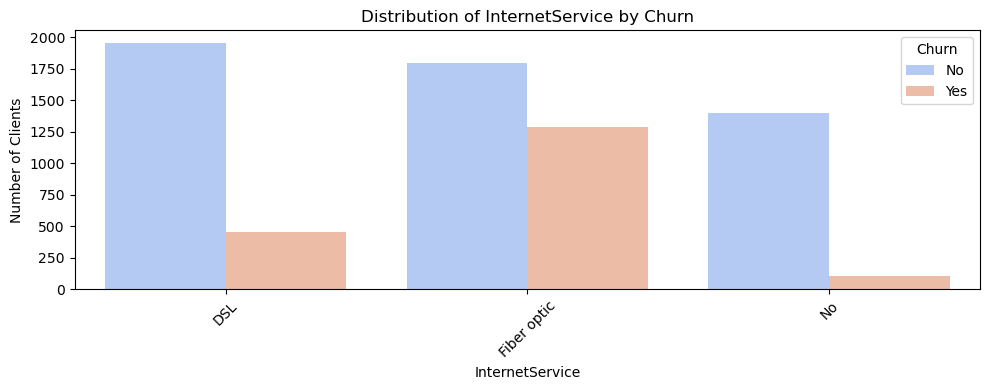

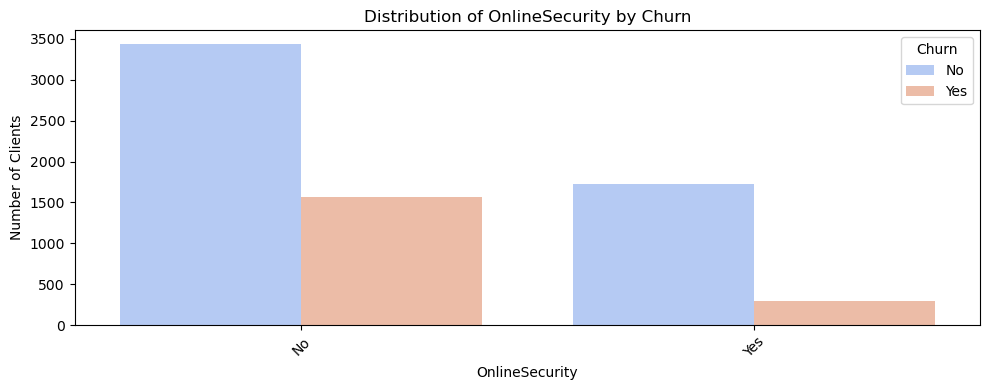

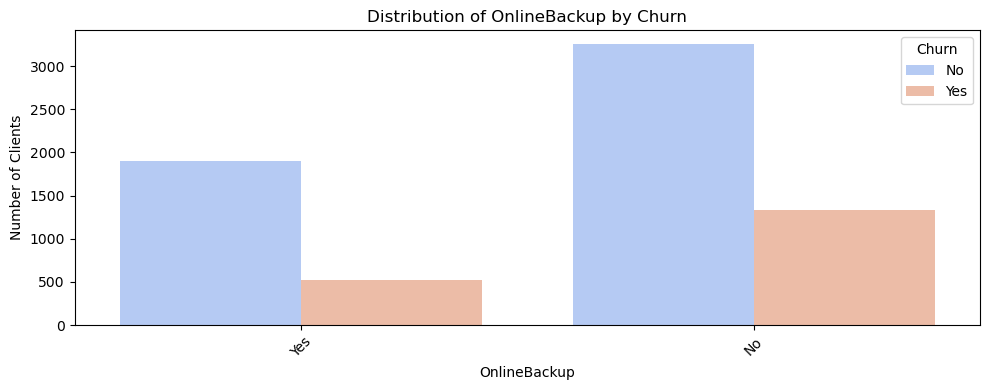

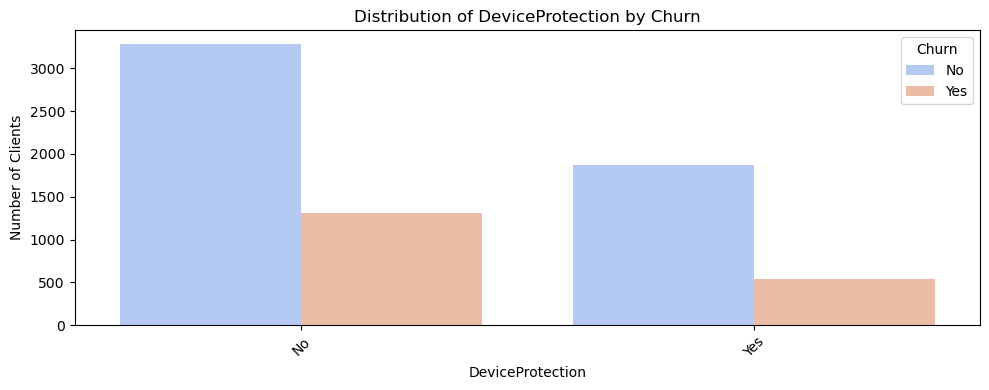

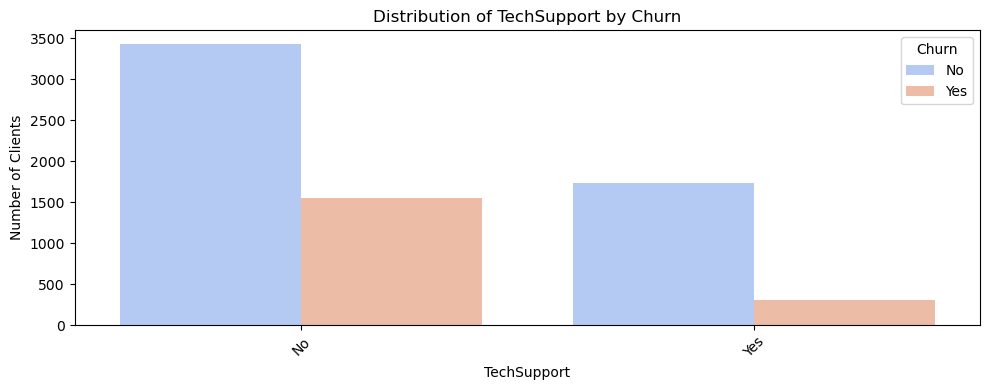

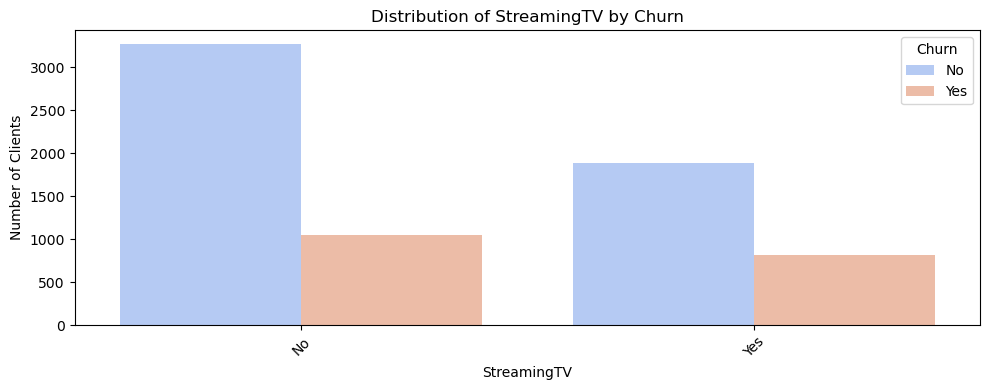

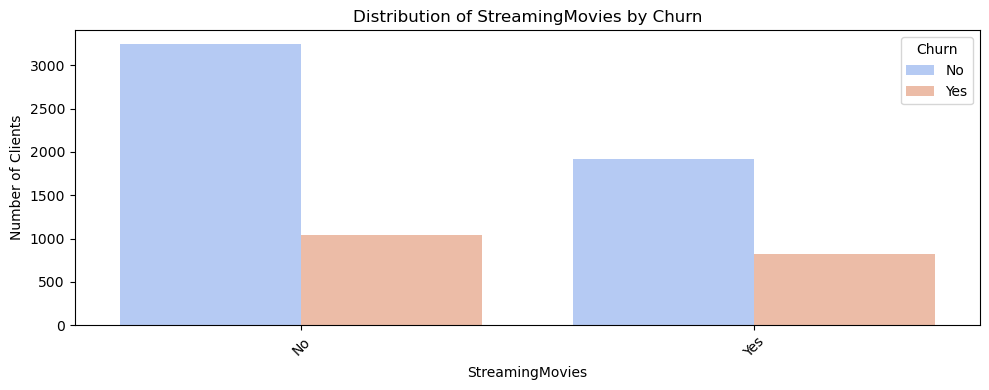

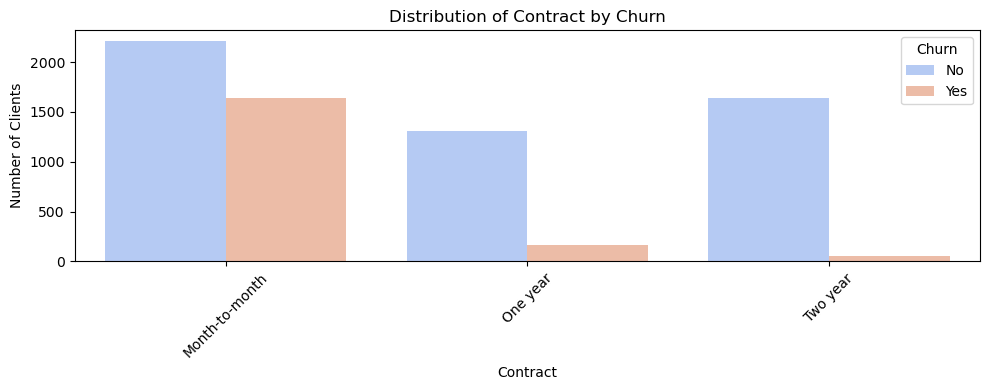

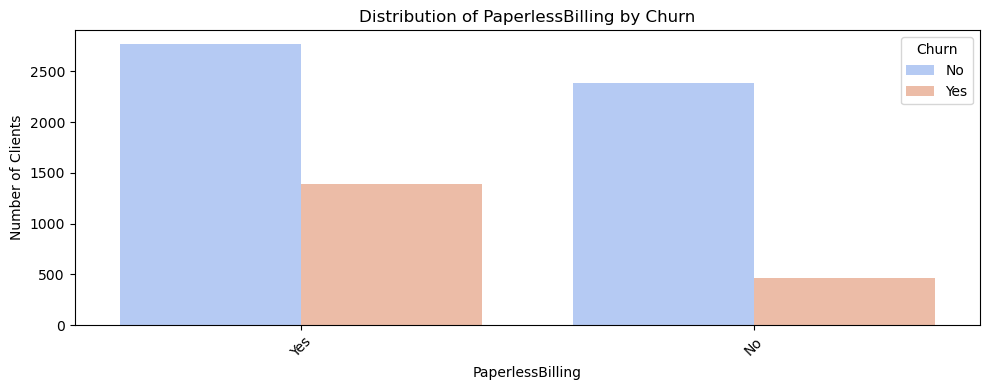

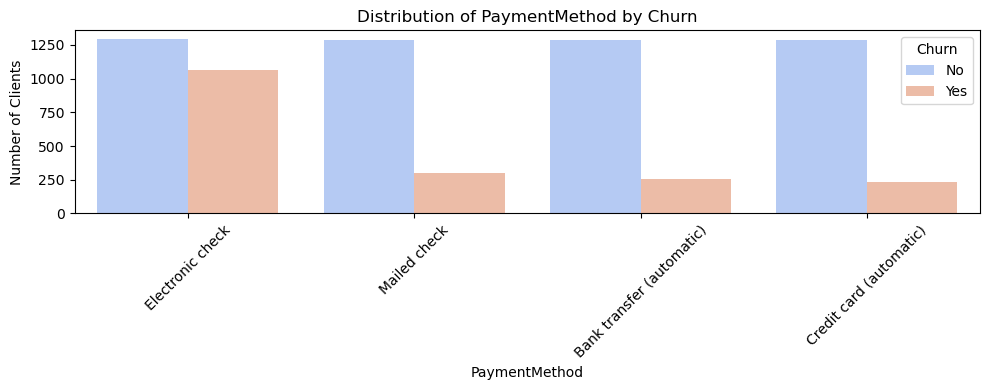

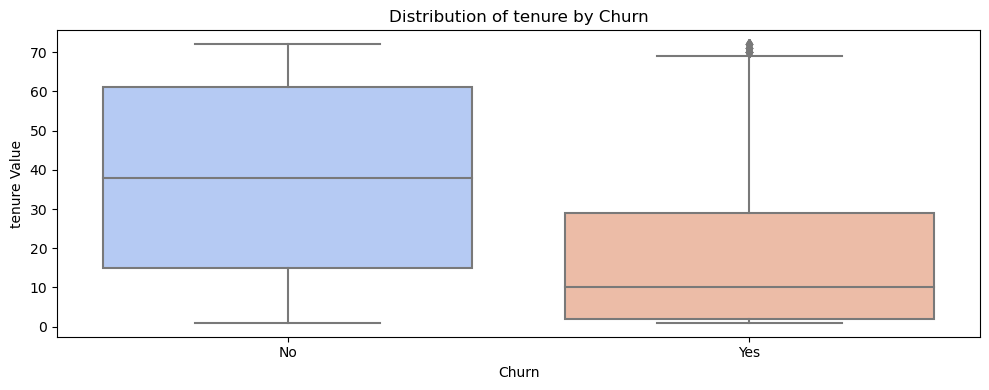

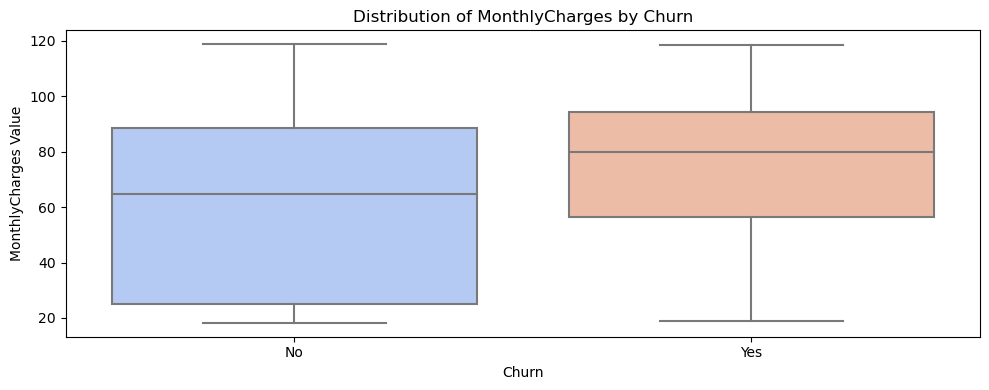

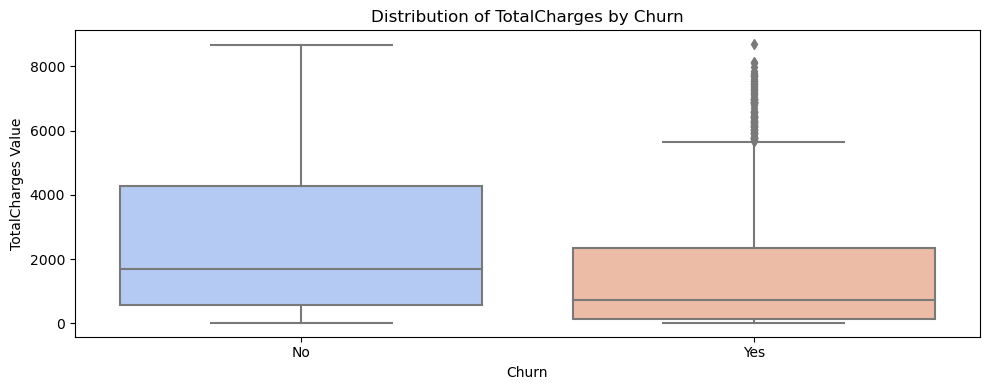

In [4]:
#4
print(df['Churn'].value_counts())
df['Churn'].value_counts().plot(kind='bar',  color='skyblue', edgecolor='black')
plt.title("Bar plot of Churn's Clients")
plt.xlabel("Ser Cliente")
plt.ylabel('Number of Clients')
plt.show()



# List of categorical attributes
cat_attributes = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                  'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                  'Contract', 'PaperlessBilling', 'PaymentMethod']

# List of numerical attributes
num_attributes = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Plotting for categorical attributes
for attribute in cat_attributes:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=attribute, hue='Churn', palette="coolwarm")
    plt.title(f"Distribution of {attribute} by Churn")
    plt.ylabel("Number of Clients")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plotting for numerical attributes
for attribute in num_attributes:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df, x='Churn', y=attribute, palette="coolwarm")
    plt.title(f"Distribution of {attribute} by Churn")
    plt.ylabel(f"{attribute} Value")
    plt.tight_layout()
    plt.show()

In [5]:
#5
def FunctionAnova (inpData, TargetVar, PredictorList):
    from scipy.stats import f_oneway
    SelectedPredictors=[]  # empty list of final selected predictors
    print('##### ANOVA Results ##### \n')
    for predictor in PredictorList:
        CategoryGroupLists=inpData.groupby(TargetVar)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        # If the ANOVA P-Value is < 0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVar, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVar, '| P-Value:', AnovaResults[1])
    return(SelectedPredictors)


##ANOVA TESTING -> usar apenas dados numéricos
numeric_data = df.select_dtypes(include=['float', 'int']).columns.tolist()
##print(numeric_data)
SelectedPredictors = FunctionAnova(df, 'Churn', numeric_data)





##### ANOVA Results ##### 

tenure is correlated with Churn | P-Value: 3.093127427396592e-205
MonthlyCharges is correlated with Churn | P-Value: 2.0218234870891158e-60
TotalCharges is correlated with Churn | P-Value: 3.914665283676891e-63


In [6]:
from scipy.stats import chi2_contingency


##Chi-square test --> dados categóricos
def chi_square_test(data, target_column):
    categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
    categorical_columns.remove(target_column)  # Remove the target variable
    
    significant_vars = []
    print(categorical_columns)
    print("Chi-Square Test Results\n")

    for column in categorical_columns:
        # Create a contingency table
        contingency_table = pd.crosstab(data[column], data[target_column])
        
        # Apply the chi-square test
        chi2, p, _, _ = chi2_contingency(contingency_table)

        # Print the results
        print(f"{column} vs {target_column}")
        print(f"Chi2 value: {chi2}, P-value: {p}\n")

        # If p-value is < 0.05, consider it as significant
        if p < 0.05:
            significant_vars.append(column)
            
    return significant_vars

# Use the function
significant_predictors = chi_square_test(df, 'Churn')
print("Significantly associated variables with Churn:", significant_predictors)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Chi-Square Test Results

gender vs Churn
Chi2 value: 0.491236602618337, P-value: 0.4833762023458479

SeniorCitizen vs Churn
Chi2 value: 159.4792982375864, P-value: 1.4703357738516273e-36

Partner vs Churn
Chi2 value: 154.26693117310947, P-value: 2.0248561714739414e-35

Dependents vs Churn
Chi2 value: 183.99998732389344, P-value: 6.48802519091279e-42

PhoneService vs Churn
Chi2 value: 0.7766911304348848, P-value: 0.37815502389537725

MultipleLines vs Churn
Chi2 value: 12.10830241889816, P-value: 0.0005019781425399228

InternetService vs Churn
Chi2 value: 728.444400823442, P-value: 6.611624411865297e-159

OnlineSecurity vs Churn
Chi2 value: 203.08431918101758, P-value: 4.433936702110834e-46

OnlineBackup vs Churn
Chi2 value: 45.7715559

In [7]:
#6
#a)
#primeiro temos de converter todas as colunas categoricas com resultados binarios (yes or no)
#para 1 ou 0, respetivamente

def is_yes_no_column(dt):
    unique_values = set(dt.dropna().unique())
    return unique_values.issubset({'Yes', 'No'} | {'Male', 'Female'})

df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})

for col in df.columns:
    if is_yes_no_column(df[col]):
        df[col] = df[col].replace({'Yes':1, 'No':0})

#Agora faltam as colunas cujas variáveis não são binárias, aka mais de valores possiveis
def apply_dumies_to_nominal_columns(df):
    categorical_cols = df.select_dtypes(include=['object']).columns

    cols_to_encode = []

    for col in categorical_cols:
        if len(df[col].unique()) > 2:
            cols_to_encode.append(col)
    print(cols_to_encode)
    df_encoded = pd.get_dummies(df, columns=cols_to_encode, prefix=cols_to_encode)
    return df_encoded

df = apply_dumies_to_nominal_columns(df)


print(df)

['InternetService', 'Contract', 'PaymentMethod']
      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7027       1              0        1           1      24             1   
7028       0              0        1           1      72             1   
7029       0              0        1           1      11             0   
7030       1              1        1           0       4             1   
7031       1              0        0           0      66             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProte

In [8]:
from sklearn.preprocessing import MinMaxScaler


#b) 
#normalizar os dados numericos

numerical_columns = df.select_dtypes(include=['number']).columns

# Step 2: Calculate the range for each numerical attribute
ranges = df[numerical_columns].max() - df[numerical_columns].min()

# Step 3: Normalize the values using Min-Max scaling
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print(df)



      gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0        0.0            0.0      1.0         0.0  0.000000           0.0   
1        1.0            0.0      0.0         0.0  0.464789           1.0   
2        1.0            0.0      0.0         0.0  0.014085           1.0   
3        1.0            0.0      0.0         0.0  0.619718           0.0   
4        0.0            0.0      0.0         0.0  0.014085           1.0   
...      ...            ...      ...         ...       ...           ...   
7027     1.0            0.0      1.0         1.0  0.323944           1.0   
7028     0.0            0.0      1.0         1.0  1.000000           1.0   
7029     0.0            0.0      1.0         1.0  0.140845           0.0   
7030     1.0            1.0      1.0         0.0  0.042254           1.0   
7031     1.0            0.0      0.0         0.0  0.915493           1.0   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0          

In [9]:
#7

from sklearn.model_selection import train_test_split
print(df.size)
# Assuming your dataframe is named df

# Separate the features from the target variable
X = df.drop('Churn', axis=1)  # Features: all columns except 'Churn'
y = df['Churn']               # Target variable

# Split the data into training and testing sets (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,          # 20% test size
    stratify=y,             # Stratify by the 'Churn' column to ensure same distribution
    random_state=42        # Random seed for reproducibility
)
print(y_test.value_counts(normalize=True))
print(y_train.value_counts(normalize=True))
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)


189270
0.0    0.735378
1.0    0.264622
Name: Churn, dtype: float64
0.0    0.735021
1.0    0.264979
Name: Churn, dtype: float64


In [10]:
#KNeighbours Classifier
#8


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Assuming X_train, y_train, X_test, and y_test are already defined

X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)


# 1. Train the KNeighbors Classifier
knn = KNeighborsClassifier() # Using default parameters
knn.fit(X_train, y_train)

# 2. Make Predictions on the Test Set
y_pred = knn.predict(X_test)

# 3. Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# 4. Calculate Precision, Recall, and F1-Score
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["No", "Yes"]))


Confusion Matrix:
[[872 159]
 [179 192]]

Classification Report:
              precision    recall  f1-score   support

          No       0.83      0.85      0.84      1031
         Yes       0.55      0.52      0.53       371

    accuracy                           0.76      1402
   macro avg       0.69      0.68      0.68      1402
weighted avg       0.75      0.76      0.76      1402



In [17]:
#9
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
#list to store the average recals
avg_recals = []

#list of possible k values (1-151)
k_values = list(range(1, 152, 2))

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    recalls = cross_val_score(knn, X_train, y_train, cv=5, scoring='recall')

    avg_recals.append(np.mean(recalls))

print(avg_recals) #ordenado de k = 1 até 151

#ordenar de forma a ver quais os melhores valores de k primeiro

best_k = k_values[np.argmax(avg_recals)]

print(best_k)
print(k_values)


[0.493977809414051, 0.5101145685038302, 0.5134793121370302, 0.5242446839762275, 0.5323322712584458, 0.5417372833480216, 0.5403837027998102, 0.5484554719454049, 0.5558515806837955, 0.5572051612320068, 0.5592231035184055, 0.5652746706437981, 0.5733441800555894, 0.5726685196483854, 0.5733464397893928, 0.5719973787087882, 0.5672858337287867, 0.5720064176440015, 0.5720041579101982, 0.574704539805211, 0.5827808284184124, 0.5780692834384109, 0.5787336451765982, 0.5868031545883895, 0.5814249881363975, 0.5800849659910063, 0.5773913632974036, 0.5787381646442049, 0.5800827062572028, 0.5726775585835988, 0.582096129075995, 0.580071407588186, 0.5746909814023908, 0.5767111834225929, 0.5787291257089915, 0.5794047861161955, 0.5841140713623935, 0.5814159492011841, 0.5787178270399747, 0.5820848304069781, 0.5773687659593699, 0.5780466861003773, 0.5793957471809821, 0.5820825706731746, 0.5874652565927734, 0.5888165774071814, 0.5881409169999774, 0.5901633787539828, 0.5901611190201794, 0.5841027726933767, 0.5

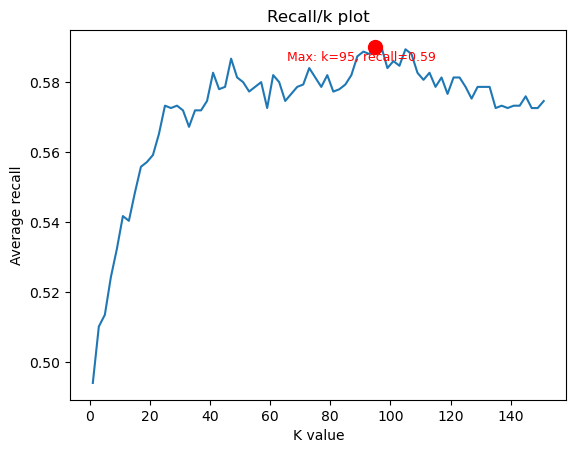

In [16]:
sns.lineplot(x=k_values, y=avg_recals)
plt.title('Recall/k plot')
plt.xlabel('K value')
plt.ylabel('Average recall')
# plt.show()

# Highlighting the maximum value
max_recall = max(avg_recals)
best_k = k_values[avg_recals.index(max_recall)]
plt.scatter(best_k, max_recall, color='red', s=100, zorder=5)  # zorder ensures the point is drawn on top

# Annotating the maximum value
plt.annotate(f'Max: k={best_k}, recall={max_recall:.2f}', 
             (best_k, max_recall), 
             textcoords="offset points", 
             xytext=(-10,-10), 
             ha='center', 
             fontsize=9, 
             color='red')

plt.show()

In [13]:
#Naive Bayes Classifier
#11

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

#inicializar o classificador GaussianNB
gnb = GaussianNB()


recalls = cross_val_score(gnb, X_train, y_train, cv=5, scoring='recall')

avg_recall = np.mean(recalls)
deviation_recall = np.std(recalls)

print(f"Average Recall: {avg_recall}")
print(f"Standard Deviation: {deviation_recall}")





Average Recall: 0.7833141255960048
Standard Deviation: 0.01759435762855888


In [14]:
#12
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score



#train knn
#95 é o melhor k, determinado previamente
knn = KNeighborsClassifier(95)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_recall = recall_score(y_test, knn_predictions)

#train GaussinNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
gnb_recall = recall_score(y_test, gnb_predictions)

#now, let's compare both models

print(f"K Neighbours recall (best k = 95): {knn_recall}")
print(f"GNB classifier recall: {gnb_recall}")


K Neighbours recall (best k = 95): 0.568733153638814
GNB classifier recall: 0.7547169811320755


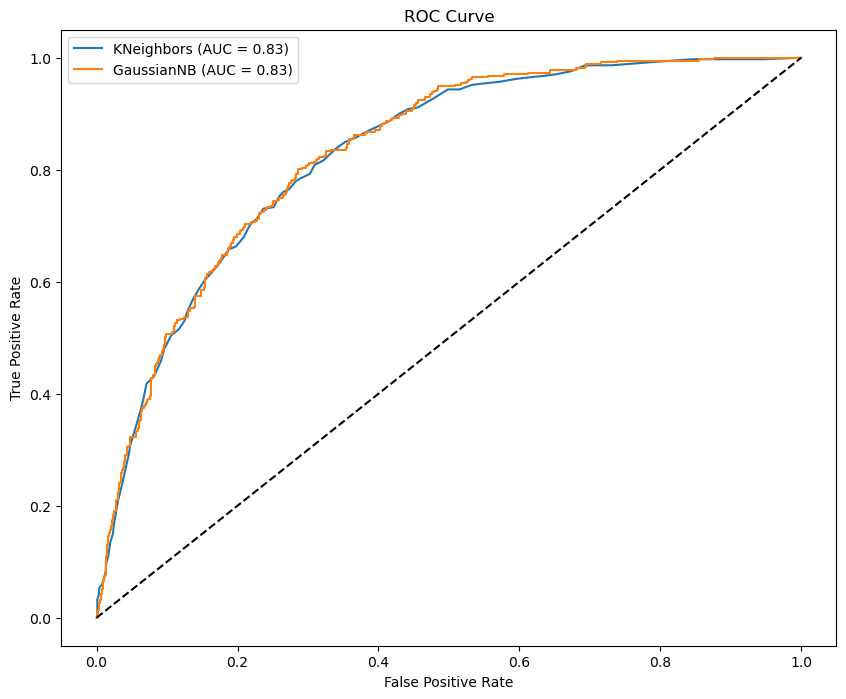

In [15]:
#13
from sklearn.metrics import roc_curve, roc_auc_score, auc

X_test = np.ascontiguousarray(X_test)
#probabilities
knn_probs = knn.predict_proba(X_test)[:, 1]
gnb_probs = gnb.predict_proba(X_test)[:, 1]

#roc curves for k neighbours
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
knn_auc = roc_auc_score(y_test, knn_probs)

#auc curves for GNB Gaussian
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, gnb_probs)
gnb_auc = roc_auc_score(y_test, gnb_probs)
print(gnb_auc)
print(kbb_auc)
#plot
plt.figure(figsize=(10, 8))
plt.plot(knn_fpr, knn_tpr, label=f'KNeighbors (AUC = {knn_auc:.2f})')
plt.plot(gnb_fpr, gnb_tpr, label=f'GaussianNB (AUC = {gnb_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [18]:
#14
#ambos os modelos são extremamente semelhantes pó churn, como visto no gráfico anterior.
#As curvas são bastante semelhantes e os valores de auc são iguais